<a href="https://colab.research.google.com/github/yoonwanggyu/Self_Study/blob/main/%EC%9D%B4%EB%AF%B8%EC%A7%80_preprocessing_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic_Preprocessing

## Download sample data

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os

In [ ]:
!pip install gdown==v4.6.3

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0


In [ ]:
!gdown 1EVDm6wR2E2ukbW3u17VKaGWk5XkDedX6

Downloading...
From: https://drive.google.com/uc?id=1EVDm6wR2E2ukbW3u17VKaGWk5XkDedX6
To: /content/imgset_mini.zip
100% 83.2k/83.2k [00:00<00:00, 86.1MB/s]


In [ ]:
!unzip imgset_mini.zip

Archive:  imgset_mini.zip
  inflating: airplane.jpg            
  inflating: car.jpg                 
  inflating: dog.jpg                 


In [ ]:
img_path = '/content/airplane.jpg'

array([[[243, 243, 213],
        [243, 243, 213],
        [245, 243, 213],
        ...,
        [249, 246, 225],
        [249, 246, 225],
        [249, 246, 225]],

       [[242, 242, 212],
        [242, 242, 212],
        [244, 242, 212],
        ...,
        [248, 245, 224],
        [248, 245, 224],
        [248, 245, 224]],

       [[243, 241, 210],
        [242, 240, 209],
        [242, 240, 210],
        ...,
        [249, 244, 223],
        [250, 245, 224],
        [250, 245, 224]],

       ...,

       [[ 86, 131, 152],
        [ 85, 130, 151],
        [ 83, 128, 149],
        ...,
        [ 84, 135, 161],
        [ 91, 142, 168],
        [ 90, 139, 165]],

       [[101, 147, 165],
        [100, 146, 164],
        [100, 148, 166],
        ...,
        [ 57, 105, 133],
        [ 71, 119, 147],
        [ 76, 123, 151]],

       [[108, 154, 171],
        [108, 154, 171],
        [116, 164, 182],
        ...,
        [ 82, 129, 157],
        [ 91, 138, 166],
        [ 90, 137, 165]]], dtype=uint8)
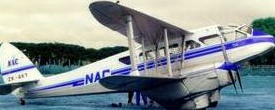

In [ ]:
img = cv2.imread(img_path)
img

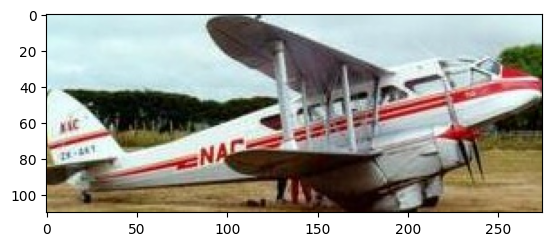

In [ ]:
# plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Resize

In [ ]:
img = cv2.imread(img_path)
img.shape

(110, 275, 3)

(90, 224, 3)

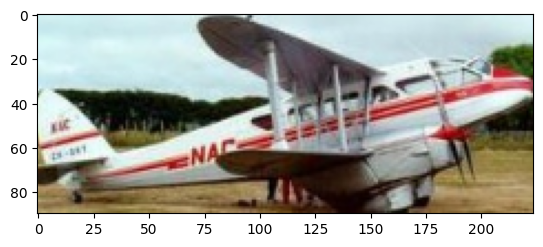

In [ ]:
# 이미지의 width와 height 중 긴 쪽을 img_size에 맞추기 -> 긴 쪽을 224로 맞추기 -> 짧은 쪽은 패딩처리 해서 (224,224) 정방향으로 그림을 resize한다
img_size = 224

if(img.shape[1] > img.shape[0]) :
    ratio = img_size/img.shape[1]
else :
    ratio = img_size/img.shape[0]

img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio, interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
img.shape

cv2.resize
- dsize : dsize에 원하는 사이즈를 입력하거나,
- fx, fy : dsize에 (0,0)주고, fx, fy에 비율을 입력하면 원하는 사이즈로 resize할 수 있다.
- interpolation : 크기를 변경할 때 어떤 보간법을 쓸지 정할 수 있다.
    1. cv2.INTER_NEAREST - 최근방 이웃 보간법 : 가장 빠르지만 퀄리티가 많이 떨어져 잘 쓰이지 않습니다.

    2. cv2.INTER_LINEAR - 양선형 보간법(2x2 이웃 픽셀 참조) : 속도도 빠르고 퀄리티도 적당하다.

    3. cv2.INTER_CUBIC - 3차회선 보간법(4x4 이웃 픽셀 참조) : cv2.INTER_LINEAR 보다 느리지만 퀄리티는 더 좋다.

    4. cv2.INTER_LANCZOS4 - Lanczos 보간법 (8x8 이웃 픽셀 참조) : 좀더 복잡해서 오래 걸리지만 퀄리티는 좋다.

    5. cv2.INTER_AREA - 영상 축소시 효과적 : 영역적인 정보를 추출해서 결과 영상을 셋팅

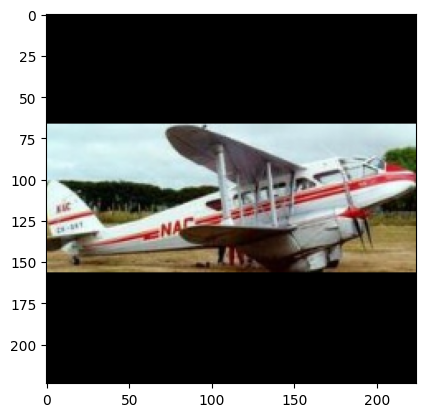

In [ ]:
# 그림 주변에 검은색으로 칠하기
w, h = img.shape[1], img.shape[0]

dw = (img_size-w)/2 # img_size와 w의 차이
dh = (img_size-h)/2 # img_size와 h의 차이

M = np.float32([[1,0,dw], [0,1,dh]])  #(2*3 이차원 행렬)
img_re = cv2.warpAffine(img, M, (224, 224)) #이동변환

cv2.imwrite('resized_img.jpg' , img_re)

plt.imshow(cv2.cvtColor(img_re, cv2.COLOR_BGR2RGB))

In [ ]:
# 직접 해보기
# 자동차 사진 불러와서, resize 수행


In [ ]:

# 강아지 사진 불러와서, 448, 448 이미지로 리사이즈해보기
# 위와 같은 방법으로 비율 유지하여 보간법으로 크기 조정 - 패딩으로 정사각형
img_path = '/content/dog.jpg'

img = cv2.imread(img_path)

# plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

(448, 235, 3)

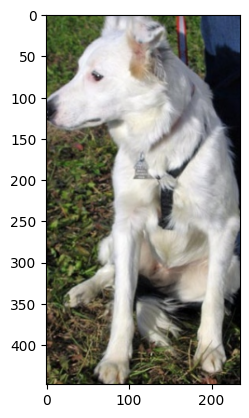

In [ ]:
img_size = 448

if(img.shape[1] > img.shape[0]) :
    ratio = img_size/img.shape[1]
else :
    ratio = img_size/img.shape[0]

img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio, interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
img.shape

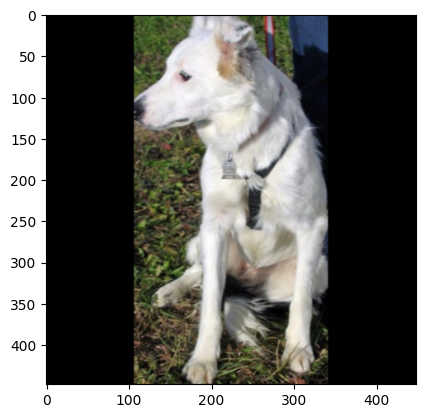

In [ ]:
w, h = img.shape[1], img.shape[0]

dw = (img_size-w)/2 # img_size와 w의 차이
dh = (img_size-h)/2 # img_size와 h의 차이

M = np.float32([[1,0,dw], [0,1,dh]])  #(2*3 이차원 행렬)
img_re = cv2.warpAffine(img, M, (448, 448)) #이동변환

cv2.imwrite('resized_img.jpg' , img_re)

plt.imshow(cv2.cvtColor(img_re, cv2.COLOR_BGR2RGB))

In [ ]:
os.mkdir('resized')

In [ ]:
for filename in ['airplane', 'car', 'dog']:
    # img_path 순회하면서 코드 반복
    img_path = '/content/'+filename+'.jpg'
    print(img_path)

/content/airplane.jpg
/content/car.jpg
/content/dog.jpg


In [ ]:
images = [] # resize img 저장

for filename in ['airplane', 'car', 'dog']:
    # img_path 순회하면서 코드 반복
    img_path = '/content/'+filename+'.jpg'
    print(img_path)
    img = cv2.imread(img_path)
    img_size = 224

    if(img.shape[1] > img.shape[0]) :
        ratio = img_size/img.shape[1]
    else :
        ratio = img_size/img.shape[0]

    img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio, interpolation=cv2.INTER_LINEAR)

    # 그림 주변에 검은색으로 칠하기
    w, h = img.shape[1], img.shape[0]

    dw = (img_size-w)/2 # img_size와 w의 차이
    dh = (img_size-h)/2 # img_size와 h의 차이

    M = np.float32([[1,0,dw], [0,1,dh]])  #(2*3 이차원 행렬)
    img_re = cv2.warpAffine(img, M, (224, 224)) #이동변환

    # 저장하는 파일명도 filename에 따라 변환
    cv2.imwrite(f'/content/resize/{filename}.jpg', img_re) # filename : 이미지 파일 이름
    images.append(img_re)

/content/airplane.jpg
/content/car.jpg
/content/dog.jpg


In [ ]:
images

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[ 20,  26,  25],
         [ 20,  26,  25],
         [ 21,  27,  26],
         ...,
         [203, 212, 215],
         [203, 212, 215],
      

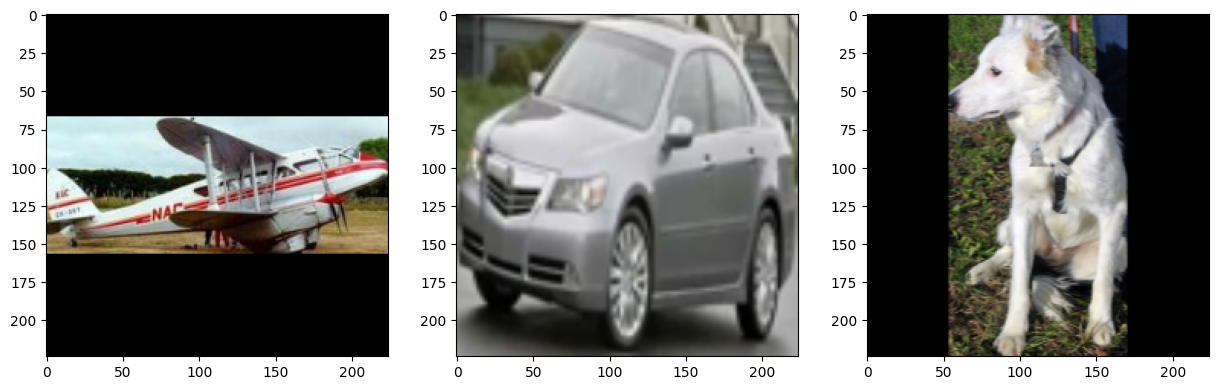

In [ ]:
plt.figure(figsize=(15,5))

for idx, img in enumerate(images):
    plt.subplot(1,3,idx+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Zero Centering

In [ ]:
# zero-centering
compute_mean = lambda imgs : np.mean(imgs, axis=0)

# 함수명 = lambda 입력 : 출력

In [ ]:
mean_img = compute_mean(images) # 3, 224, 224, 3 -> 224, 224, 3

In [ ]:
mean_img.shape

(224, 224, 3)

In [ ]:
mean_img

array([[[ 6.66666667,  8.66666667,  8.33333333],
        [ 6.66666667,  8.66666667,  8.33333333],
        [ 7.        ,  9.        ,  8.66666667],
        ...,
        [67.66666667, 70.66666667, 71.66666667],
        [67.66666667, 70.66666667, 71.66666667],
        [67.66666667, 70.66666667, 71.66666667]],

       [[ 7.33333333,  9.33333333,  9.        ],
        [ 7.33333333,  9.33333333,  9.        ],
        [ 7.66666667,  9.66666667,  9.33333333],
        ...,
        [66.66666667, 69.66666667, 70.66666667],
        [68.        , 71.        , 72.        ],
        [68.66666667, 71.66666667, 72.66666667]],

       [[ 9.        , 11.        , 10.66666667],
        [ 9.        , 11.        , 10.66666667],
        [ 9.        , 11.        , 10.66666667],
        ...,
        [63.66666667, 66.66666667, 67.66666667],
        [69.        , 72.        , 73.        ],
        [71.        , 74.        , 75.        ]],

       ...,

       [[49.        , 49.        , 49.        ],
        [48

In [ ]:
zero_centered_images = images - mean_img

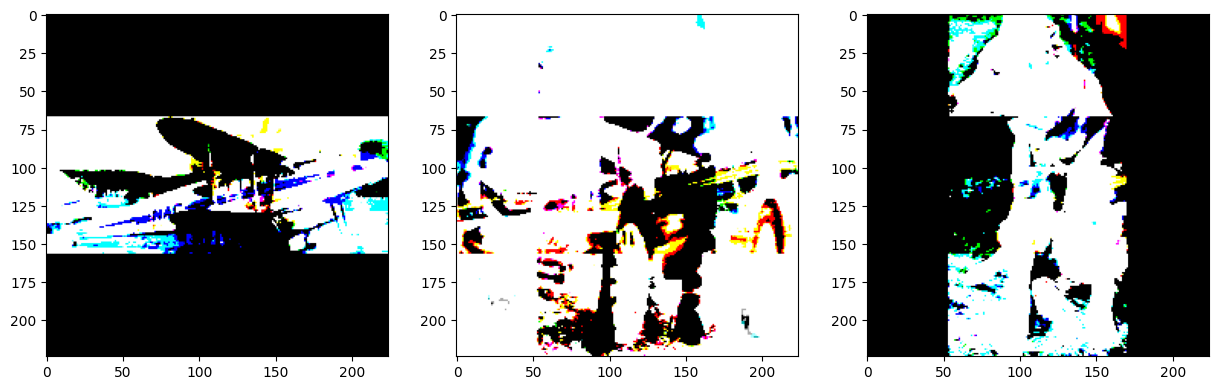

In [ ]:
plt.figure(figsize=(15,5))

for idx, zc_img in enumerate(zero_centered_images):
    plt.subplot(1,3,idx+1)
    plt.imshow(zc_img)

## Grayscaling & Binarization

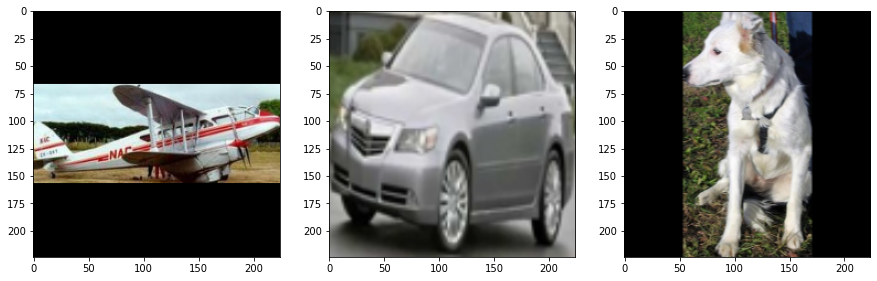

In [ ]:
plt.figure(figsize=(15,5))

for idx, img in enumerate(images):
    plt.subplot(1,3,idx+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
grayscale = lambda img : cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
gray_imgs = []
for img in images:
    gray_imgs.append(grayscale(img))

# 리스트를 만들 때, 그 코드가 단순하다면 내포용법으로
gray_imgs = [grayscale(img) for img in images]

In [ ]:
gray_imgs = [grayscale(img) for img in images]
gray_imgs

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 25,  25,  26, ..., 212, 212, 212],
        [ 27,  27,  28, ..., 209, 213, 215],
        [ 32,  32,  32, ..., 200, 216, 222],
        ...,
        [147, 146, 144, ..., 163, 165, 166],
        [148, 148, 146, ..., 162, 164, 165],
        [149, 148, 146, ..., 162, 164, 165]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]

In [ ]:
gray_imgs[0].shape

(224, 224)

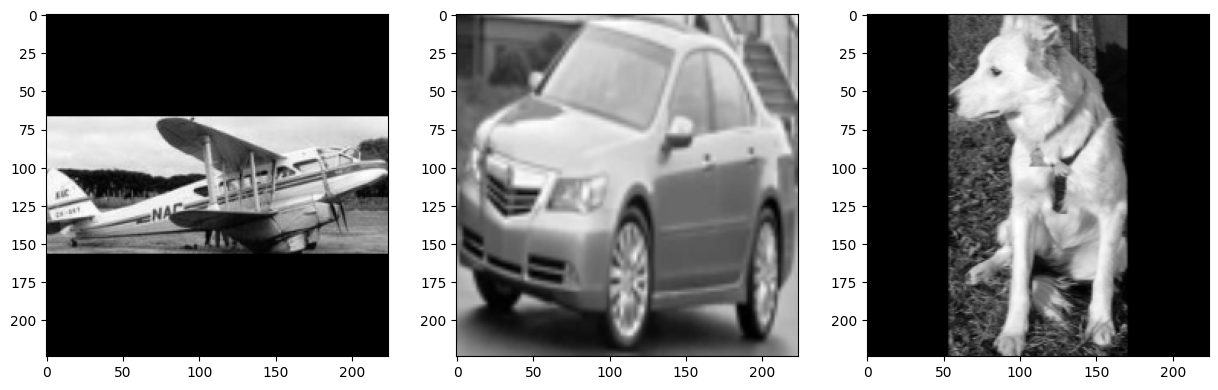

In [ ]:
plt.figure(figsize=(15,5))

for idx, img in enumerate(gray_imgs):
    plt.subplot(1,3,idx+1)
    # plt.imshow(img) #  색상 맵(color map)을 자동으로 적용하기 때문에 제대로 출력x
    plt.imshow(img, cmap='gray')

In [ ]:
thresh = 127
binarization = lambda img : cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)

In [ ]:
bin_imgs = [binarization(img)[1] for img in gray_imgs]
bin_imgs

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]

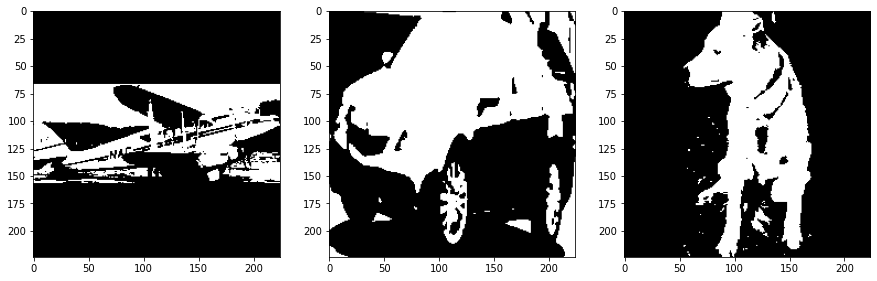

In [ ]:
plt.figure(figsize=(15,5))

for idx, img in enumerate(bin_imgs):
    plt.subplot(1,3,idx+1)
    # plt.imshow(img) #  색상 맵(color map)을 자동으로 적용하기 때문에 제대로 출력x
    plt.imshow(img, cmap='gray')